# Networks

You need to install `networkx` on your laptops. Documentation can be found here: [https://networkx.github.io/documentation/stable/index.html](https://networkx.github.io/documentation/stable/index.html)

**INSTALL:**
- Try `pip install networkx`, `sudo pip install networkx` or with `pip3`
- or `pip install --user networkx`

### Introduction to Networkx

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

We can create empty graphs and add nodes/edges.

In [39]:
G = nx.Graph()
G.add_edge('a','b')
G.add_edge('a','c')
G.add_edge('b','c')
G.add_edge('a','d')

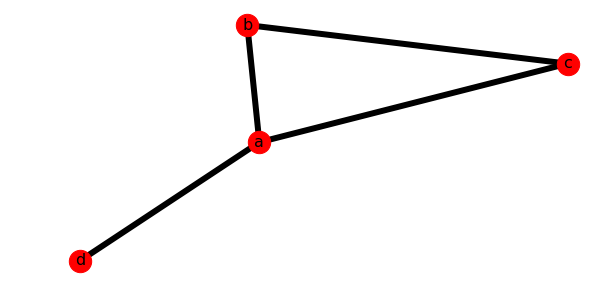

In [40]:
plt.figure(figsize = (10,5))

nx.draw_networkx(G, with_labels = True, node_size=500, font_size=16, width=6) 

plt.axis('off');

We can add weighted edges

In [41]:
G.add_edge('b','d', weight = 0.1)
G.add_edge('a','d', weight = 4)

/home/emma/.local/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


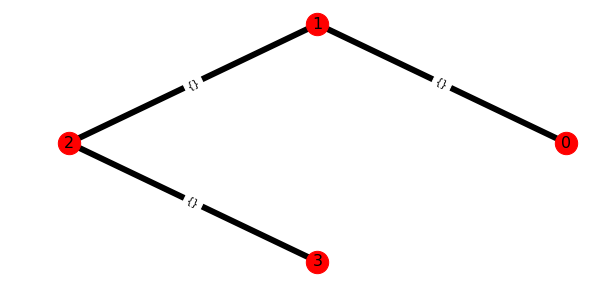

In [50]:
plt.figure(figsize = (10,5))
labels = G.nodes()
pos=nx.circular_layout(G)
nx.draw_networkx(G, with_labels = True, node_size=500,pos = pos, font_size=16, width=6) 

nx.draw_networkx_edge_labels(G,pos);
plt.axis('off');

We can remove edges.

In [9]:
G.remove_edge('a','b')

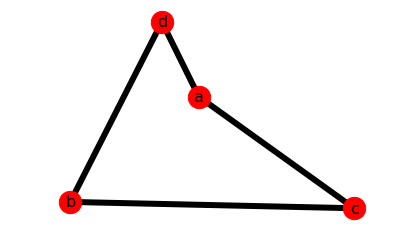

In [10]:
nx.draw_networkx(G, with_labels = True, node_size=500,pos = pos, font_size=16, width=6) 
plt.axis('off');

### Indexing:

In [11]:
G.nodes #Python dictionary

NodeView(('d', 'a', 'c', 'b'))

In [12]:
for node in G.nodes():
      print('Node', node)

Node d
Node a
Node c
Node b


It can be usefull to change the labels of all nodes to numeric values, starting in zero.

In [13]:
G = nx.convert_node_labels_to_integers(G, first_label=0)
for node in G.nodes():
      print('Node', node)

Node 0
Node 1
Node 2
Node 3


In [14]:
for weight in G.edges(data=True):
      print(weight)

(0, 1, {'weight': 4})
(0, 3, {'weight': 0.1})
(1, 2, {})
(2, 3, {})


We can add weights to all edges:

In [15]:
for edge in G.edges():
      G[edge[0]][edge[1]]['weight'] = 1.5
# Printing...
for n1 in G.edges(data=True):
      print(n1)

(0, 1, {'weight': 1.5})
(0, 3, {'weight': 1.5})
(1, 2, {'weight': 1.5})
(2, 3, {'weight': 1.5})


## Graph operators

In [16]:
G.clear()
print(G.nodes())
print(G.edges)

[]
[]


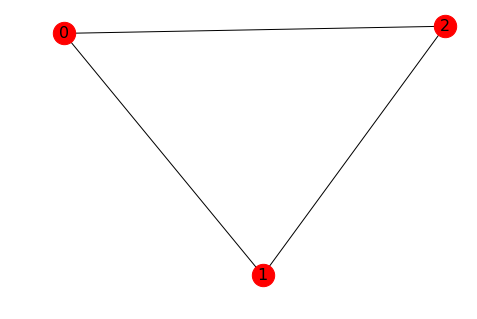

In [17]:
G = nx.Graph([(0,1),(1,2),(2,0)])
nx.draw(G, with_labels = True, node_size=500, font_size=16)
plt.show(True)

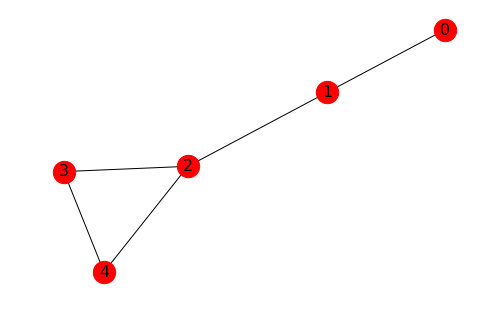

In [18]:
G1 = nx.Graph([(0,1),(1,2),(2,3), (3,4), (2,4)])
nx.draw(G1, with_labels = True, node_size=500, font_size=16)
plt.show(True)

G2 is the disjoint union of G and G1.

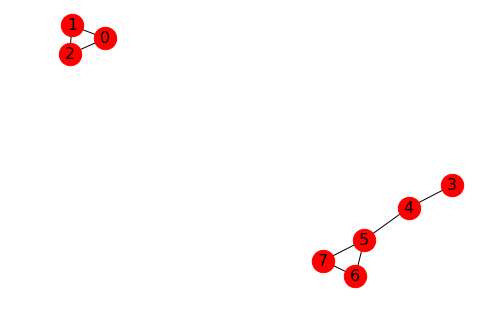

In [19]:
G2 = nx.disjoint_union(G,G1)
nx.draw(G2, with_labels = True, node_size=500, font_size=16)
plt.show(True)

Notice that the labels are changed and now the graph has 7 nodes.

In [20]:
print('Nodes:', G2.nodes())
print('Edges:', G2.edges())

Nodes: [0, 1, 2, 3, 4, 5, 6, 7]
Edges: [(0, 1), (0, 2), (1, 2), (3, 4), (4, 5), (5, 6), (5, 7), (6, 7)]


Another option is to compose the graphs. In this case, nodes with the same label in different graphs are considered as the same.

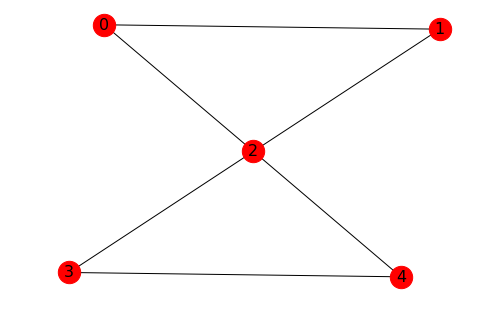

In [21]:
G3 = nx.compose(G,G1)
nx.draw(G3, with_labels = True, node_size=500, font_size=16)
plt.show(True)

We can create directed graphs:

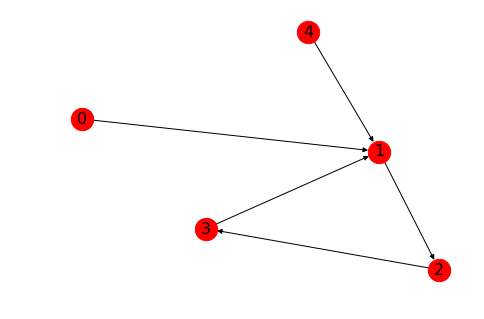

In [22]:
G.clear()
edgelist=[(0,1),(1,2),(2,3), (3,1), (4,1)]
G = nx.DiGraph(edgelist)
pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

### Largest Component

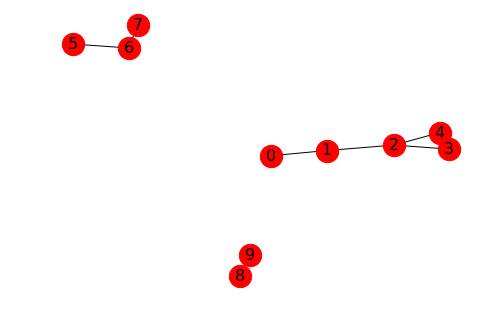

In [23]:
G.clear()
G = nx.Graph([(0,1),(1,2),(2,3), (3,4), (2,4), (5,6), (6,7), (8,9)])
nx.draw(G, with_labels = True, node_size=500, font_size=16)
plt.show(True)

In [24]:
# get the components
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
print(Gcc[0].nodes())
print(Gcc[1].nodes())
print(Gcc[2].nodes())

[0, 1, 2, 3, 4]
[5, 6, 7]
[8, 9]


[0, 1, 2, 3, 4]


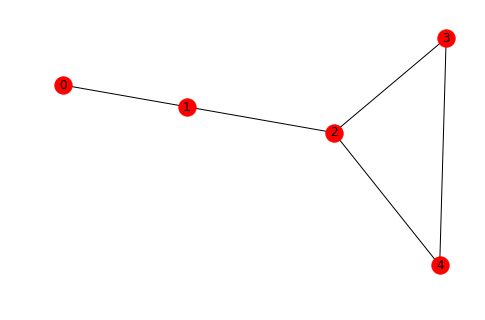

In [25]:
#get the largest component
G=Gcc[0]
print(G.nodes())
nx.draw(G, with_labels = True)
plt.show()

## Network Structure: Degree, clustering and distance

/home/emma/.local/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


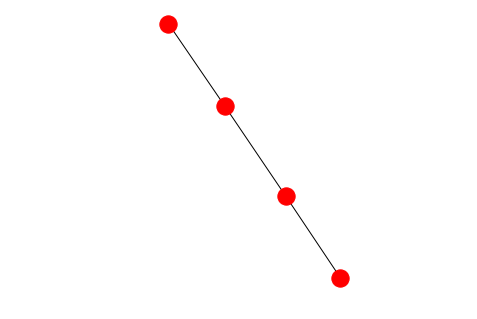

In [57]:
nx.draw(G)

In [51]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 4
Number of edges: 3


In [52]:
vk = dict(G.degree())
vk = list(vk.values())
vk = np.array(vk)
print('Degree = ', vk)

Degree =  [1 2 2 1]


In [53]:
md = np.mean(vk)
print('Mean degree: ', md)

Mean degree:  1.5


In [54]:
# degree distribution
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [55]:
ks, Pk = degree_distribution(G)

### Transitivity and clustering
In addition to the degree, another important property of networks is related to the number of triangles, which is related to the concept of transitivity. The transitivity of the network G is calculated as:

In [34]:
CC = (nx.transitivity(G)) 
print("Transitivity = ",CC)

Transitivity =  0.5


The level of triangles in a network can also be quantified by the average clustering coefficient, calculated from the local clustering coefficient, i.e.,

In [35]:
avc = nx.average_clustering(G)
print("Average clustering:", avc)

Average clustering: 0.4666666666666666


### Distance

The distance between pairs of  nodes is given by the number of edges between them, where edges and nodes are not repeated. The distance with the minimal length is called the shortest path. The average shortest path length can be calculated by:

In [36]:
if nx.is_connected(G) == True:
    l = nx.average_shortest_path_length(G)
    print("Average shortest path length:", l)
else:
    print("The graph has more than one connected component")

Average shortest path length: 1.7


The matrix of distances stores the distances between all pairs of nodes. From this matrix, we can calculate the distribution of the shortest paths between all pairs of nodes. Notice that $D$ is symmetric, because are considering undirected networks.

# Karate Club Example

In [61]:
G = nx.karate_club_graph()

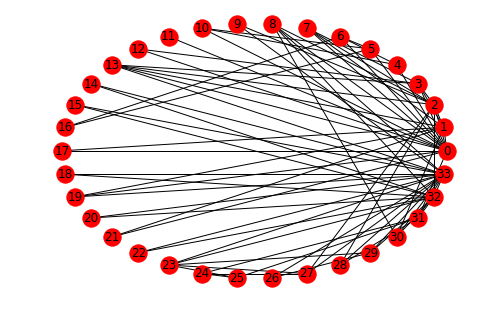

In [63]:
nx.draw_circular(G, with_labels=True)


In [64]:
# print("Node Degree")
for v in G:
    print('%s %s' % (v, G.degree(v)))

0 16
1 9
2 10
3 6
4 3
5 4
6 4
7 4
8 5
9 2
10 3
11 1
12 2
13 5
14 2
15 2
16 2
17 2
18 2
19 3
20 2
21 2
22 2
23 5
24 3
25 3
26 2
27 4
28 3
29 4
30 4
31 6
32 12
33 17


In [65]:
ks, Pk = degree_distribution(G)

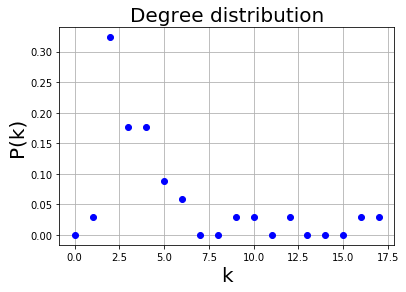

In [66]:
plt.figure()
plt.plot(ks,Pk,'bo', label='Data')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
